### In this notebook, we will take our ugly spaghetti code and add abstraction through the use of functions to develope a 2 state and 3 state CA

In [1]:
import random
from matplotlib import pyplot as plt
%matplotlib inline

The code below sets the jupyter notebook "pager" to print inline, so that it pager outputs can be viewed on GitHub without running the notebook

In [2]:
def page_printer(data, start=0, screen_lines=0, pager_cmd=None):
    if isinstance(data, dict):
        data = data['text/plain']
    print(data)

import IPython.core.page
IPython.core.page.page = page_printer

Our ECA spaghetti code

# Two State Functions

In [3]:
def make_initial_conditions(length):
    '''
    Calculate a list of 0 and 1 to set initial CA conditions
    
    Inputs:
    ----------
    length: int
        the length of the initial conditions
        
    Returns:
    initial_condition: list
        list with initial conditions
    '''
    initial_condition = []
    for i in range(length):
        initial_condition.append(random.randint(0,1))
    return initial_condition

In [4]:
def make_neighborhoods():
    '''
    Create neighborhoods in 
    
    '''
    neighborhoods = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]
    return neighborhoods

In [5]:
def convert_rule_to_binary(rule_number):
    in_binary = bin(rule_number)[2:][::-1]
    binary_length = len(in_binary)
    if binary_length != 8:
        padding = 8 - binary_length
        in_binary = in_binary + '0'*padding
    return in_binary

In [6]:
def create_lookup_table(rule_number):
    # create list of neighborhood tuples in lex. order
    neighborhoods = make_neighborhoods()
    
    # convert the rule number to binary and pad with 0s as needed
    in_binary = convert_rule_to_binary(rule_number)
    
    # create the lookup table dictionary
    lookup_table = {key:int(val) for key, val in zip(neighborhoods, reversed(in_binary))}
    return lookup_table

In [7]:
def plot_spacetime_field(spacetime_field):    
    # plot the spacetime field diagram
    plt.figure(figsize=(12,12))
    plt.imshow(spacetime_field, cmap=plt.cm.Greys, interpolation='nearest')
    plt.show()

In [8]:
def evolve_CA(initial_condition, lookup_table, rule_number, time):

    # initialize spacetime field and current configuration
    spacetime_field = [initial_condition]
    current_configuration = initial_condition.copy()
    length = len(initial_condition)
    # apply the lookup table to evolve the CA for the given number of time steps
    for t in range(time):
        new_configuration = []
        for i in range(len(current_configuration)):

            neighborhood = (current_configuration[(i-1)], 
                            current_configuration[i], 
                            current_configuration[(i+1)%length])

            new_configuration.append(int(lookup_table[neighborhood]))

        current_configuration = new_configuration
        spacetime_field.append(new_configuration)
    return spacetime_field

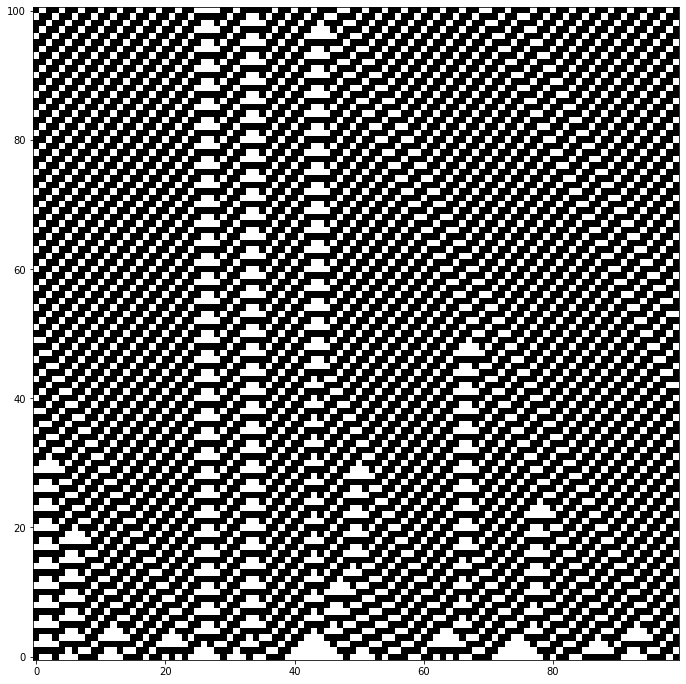

In [9]:
rule_number = 110
time=100
length=100

initial_condition = make_initial_conditions(length)

lookup_table = create_lookup_table(rule_number)

spacetime_field = evolve_CA(initial_condition, lookup_table, rule_number, time)

plot_spacetime_field(spacetime_field)

# Tests

In [10]:
def test_create_lookup_table():
    expected = {(0,0,0):0, (0,0,1):0, (0,1,0):0, (0,1,1):1, (1,0,0):1, (1,0,1):1, (1,1,0):1, (1,1,1):0}
    observed = create_lookup_table(30)
    assert expected == observed

In [11]:
test_create_lookup_table()

# 3 State Function (0, 1, 2)

Assuming each cell depends on its two neighboring cells and its own value to determine the next value, there are $3\times3\times3=27$ neighborhoods we have to define and each neighborhood can take on 1 of 3 values, so there are a total of $3^{27}$ cellular automata 

In [12]:
def make_initial_conditions_ternary(length):
    initial_condition = []
    for i in range(length):
        initial_condition.append(random.randint(0,2))
    return initial_condition

In [13]:
def make_ternary_neighborhoods():
    '''
    Create neighborhoods for the ternary case as tuples in lexicographical order
    Inputs:
    -------
    None
    
    Returns:
    ---------
    neighborhoods: list
        list of neighborhood tuples in lexicographical order
    '''
    neighborhoods = [(0,0,0), (0,0,1), (0,0,2), (0,1,0), (0,1,1), (0,1,2), (0,2,0), (0,2,1), (0,2,2), 
                     (1,0,0), (1,0,1), (1,0,2), (1,1,0), (1,1,1), (1,1,2), (1,2,0), (1,2,1), (1,2,2), 
                     (2,0,0), (2,0,1), (2,0,2), (2,1,0), (2,1,1), (2,1,2), (2,2,0), (2,2,1), (2,2,2)]
    return neighborhoods

In [14]:
def convert_rule_to_ternary(rule_number):
    '''
    Convert rule number to ternary
    
    Inputs:
    --------
    rule_number: int
        rule number to be turned into ternary number between 0 and 3^27
    
    Returns:
    --------
    ternary: str
        ternary string with length 27
    '''
    ternary = [3**i for i in range(27)]
    in_ternary = ''
    for place in reversed(ternary):
        if place > rule_number:
            in_ternary+='0'
            continue #move onto next number
        else:
            if 2*place <= rule_number:
                in_ternary += '2'
                rule_number -= 2*place
            elif place <= rule_number:
                in_ternary += '1'
                rule_number -= place
            else:
                in_ternary += '0'
    return in_ternary

In [15]:
def create_lookup_table_ternary(rule_number):
    '''
    Create a lookup table with ternary neighborhoods as keys and mapping to rule number converted to ternary
    
    Input:
    ------
    rule_number: int
        rule number to be turned into ternary number between 0 and 3^27
        
    Returns:
    --------
    lookup_table: dict
        lookup table mapping ternary neighborhoods to rule number in ternary
    
    '''
    # create list of neighborhood tuples in lex. order
    neighborhoods = make_ternary_neighborhoods()
    
    # convert the rule number to binary and pad with 0s as needed
    in_ternary = convert_rule_to_ternary(rule_number)
    
    # create the lookup table dictionary
    lookup_table = {key:int(val) for key, val in zip(neighborhoods, reversed(in_ternary))}
    return lookup_table

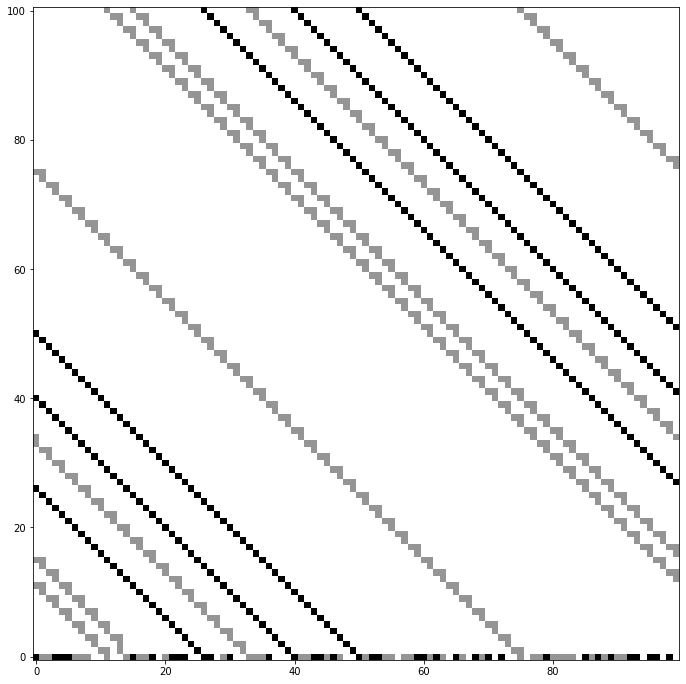

In [16]:
rule_number =48
time=100
length=100

initial_condition = make_initial_conditions_ternary(length)

lookup_table = create_lookup_table_ternary(rule_number)

spacetime_field = evolve_CA(initial_condition, lookup_table, rule_number, time)

plot_spacetime_field(spacetime_field)

# Tests

In [17]:
def test_make_initial_conditions_ternary():
    '''Test that all values in initial conditions are either a 0, 1, or 2'''
    observed = make_initial_conditions_ternary(10)
    for i in observed:
        assert i in (0,1,2)

In [18]:
def test_make_ternary_neighborhoods():
    '''Test that a random neighborhood exists'''
    neighborhood = [random.randint(0,2) for i in range(3)]
    ternary_neighborhoods = make_ternary_neighborhoods()
    assert tuple(neighborhood) in ternary_neighborhoods, print(neighborhood)

In [19]:
def test_ternary():
    '''Test that rule 110 returns the correct ternary'''
    expected = '000000000000000000000011002'
    observed = convert_rule_to_ternary(110)
    assert expected == observed

In [20]:
def test_create_lookup_table_ternary_length():
    '''Test that lookup table is correct length'''
    expected = 27
    lookup_table = create_lookup_table_ternary(110)
    assert len(lookup_table) == 27

In [21]:
def test_create_lookup_table_ternary():
    '''test basic case of rule 1 maps to 1'''
    expected = 1
    lookup_table = create_lookup_table_ternary(1)
    assert lookup_table[(0,0,0)]==expected

In [22]:
def test_evolve_CA():
    '''
    Test specific evolution of rule 110
    '''
    rule_number = 110
    time=2
    initial_condition = [0,0,0,2,0,0,0]
    lookup_table = create_lookup_table_ternary(rule_number)
    spacetime_field = evolve_CA(initial_condition, lookup_table, rule_number, time)
    assert initial_condition == spacetime_field[-1]


## Run Tests

In [23]:
test_make_initial_conditions_ternary()

In [24]:
test_make_ternary_neighborhoods()

In [25]:
test_ternary()

In [26]:
test_create_lookup_table_ternary_length()
test_create_lookup_table_ternary()

In [27]:
test_evolve_CA()